In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

# **Stochastic Gradient Descent** (Solutions)

**Introduction:**

Our assignment will introduce students to the foundations of gradient descent with a primary focus on stochastic gradient descent (SGD). Students will implement and explore various properties of SGD (learning rate, batch size) and its performance on various loss functions. They will work with real data to practice their technical skills and to motivate variations to explore in different situations.

**Project Outline & Learning Goals:**


1.   Sklearn Tutorial
*   Student's will use Sklearn's Boston housing data set to make predictions on the price of homes.  
*   Learn to import a data set and explore properties of the data set while at the same time learning to go through code documentation.
* Students will use SGDRegressor to go through the full pipeline of training the model, fitting the model, and finally using the model to predict housing prices as well as quantify how well our model performed.

2.   Introduction to Gradient Descent

*   Students will implement the gradient descent algorithm to minimize the mean squared errror loss function for regression and explore the effects of changing the learning rate and the number of iterations on the performance of the algorithm. Students will become comfortable working with matplotlib/numpy while also gaining an understanding of gradient descent, the role of the learning rate and its effect on the convergence of the gd algorithm.
*   Students will implement mini-batch gradient descent and study the effects of changing the batch size on the performance of the algorithm. Additionally, compare the results to that of regular/full batch gradient descent and the regular closed form OLS solution. Students will be able to implement mini-batch gradient descent, understand why this is useful in practical scenarios and understand how it compares to other methods. Additionally, students will gain practice working with linear algebra functions in numpy.




3.   Stochastic Gradient Descent

* Students will adjust the learning rate and number of iterations of SGD to analyze how the parameters impact the accuracy of the algorithm. They will compare these results to the results obtained by batch gradient descent in the previous section.

4.   Loss Functions
* Students will work with different loss functions and do regression on the provided data set. They will adjust the parameters for the SGDRegressor function provided by sklearn and describe how a varying learning rate can shift the regression line and get more practice with sklearn.

5.   Variations on Gradient Descent

* Students will implement traditional gradient descent on a toy one-dimensional function, noticing that it converges to a local, rather than global minimum.

* They will use equations from the notes/slides to implement Gradient Descent with momentum, produce relevant plots, and provide interpretation to the velocity term in momentum-based descent.

* Finally, they will implement the ADAM Optimizer and notice how it allows us to go past local minima to global minima.



# **Part 1: Sklearn Tutorial**




Let's go through a simple example using the provided sklearn's Boston house dataset.

* CRIM per capita crime rate by town

* ZN proportion of residential land zoned for lots over 25,000 sq.ft.

* INDUS proportion of non-retail business acres per town

* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

* NOX nitric oxides concentration (parts per 10 million)

* RM average number of rooms per dwelling

* AGE proportion of owner-occupied units built prior to 1940

* DIS weighted distances to five Boston employment centres

* RAD index of accessibility to radial highways

* TAX full-value property-tax rate per $10,000

* PTRATIO pupil-teacher ratio by town

* B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

* LSTAT % lower status of the population

* MEDV Median value of owner-occupied homes in $1000’s

First let's find some information about our data. Find the number of samples and the dimensionality.

In [ ]:
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)
num_samples = X.shape[0] # ANSWER
dimensionality = X.shape[1] #ANSWER
num_samples, dimensionality

(506, 13)

In practice, it is always a good idea to create visualizations to better understand the data we are working with. 

Create a 3D scatter plot using the first three columns in our data set. Remember to label your axes! 

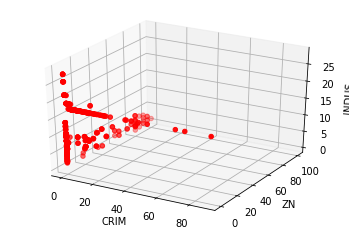

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = X[:, 0]
y = X[:,1]
z =X[:,2]



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('CRIM')
ax.set_ylabel('ZN')
ax.set_zlabel('INDUS')

plt.show()

Is there anything interesting about this plot? Comment on one interesting thing about this plot. This is an openended question.

ANSWER: <font color = red>The data tends to be clustered in one corner and looks like there is some overplotting. There also seems to overplotting so one thing we could do is add some jittering.</font>

Finally, use SGDRegressor to make predictions for the data set.

1) Use SGDRegressor to implement a SGD linear model

2) Normalize the features so that different features can take on similar ranges of values.

3) Fit the model

4) Finally make predictions with the fitted model and output the mean square error

Note: Look into sklearn.pipeline_make_pipeline to help with parts 1) and 2).

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
 
# YOUR CODE HERE
model = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
model.fit(X, y)
pred = model.predict(X)

print("Training MSE:", np.mean((pred - y) ** 2))

Training MSE: 0.015621662183698823


# **Part 2: Introduction to Gradient Descent**

In this section you will become more comfortable with the gradient descent algorithm and study its performance. 

**Part 2.1: Introduction to Gradient Descent and Learning Rate** 

First we will generate some noisy data and visualize it.
We know what kind of form the data is in and what the weights are in this case but we can pretend that we did not know this and that we predict the form of out model by looking at the visualization alone.


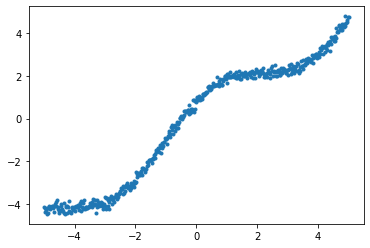

In [ ]:
x = np.linspace(-5, 5, 500)
noise = np.random.normal(0, 0.15, len(x))
y = np.array([x[i] + np.sin(x[i] + 1) + noise[i]  for i in range(len(x))])
# visualizing the data
plt.scatter(x,y, marker = '.')
plt.show()

Based on the visualization of our data above we want to learn a function of form: $y = w_0*x + w_1*sin(w_2*x + w_3) $

Our model is parameterized by the w's which are represented by the w vector,  **w** $= [w_0, w_1, w_2, w_3]$. The x's are the input data, and we will make predictions based on our parameters and this model.

In this section you will:
1. Implement the loss function and the gradient of the loss function
2. Implement the gradient descent algorithm
3. Compare different learning rates and number of iterations




Now you will implement the error function, and the gradient of the error function by computing the derivatives of the errors with repect to each of the parameters and finally combine these derivatives into a gradient vector. 

The error/loss function we want to implement here is the *mean-squared-error* which is essentially the same idea as the loss function you used for linear regression, except that now you will divide by n:



$Loss(x, y, w0, w1, w2, w3) = \frac{1}{N}\sum_{i=1}^n (\hat y_i - y_i)^2$


In [ ]:
def mse(x, y, w):
  #review notes and implement the mean squared error
  mse = 0
  n = len(x)
  for i in range(n):
      mse += (y[i] - w[0]*x[i] - np.sin(w[2]*x[i]))**2
        
  return (1/n) * mse

def mse_gradient(x, y, w):

  n = len(x)
  mse_dw0 = 0
  mse_dw1 = 0
  mse_dw2 = 0
  mse_dw3 = 0

  for i in range(n):
    #derivative of mse with respect to w0
    mse_dw0 += (y[i] - w[0]*x[i] - np.sin(w[2]*x[i]))*(-2*x[i])

    #derivative of mse with respect to w1
    mse_dw1 += (y[i] - w[0]*x[i] - w[1]*np.sin(w[2]*x[i] + w[3]))*(-2*np.sin(w[2]*x[i] + w[3]))

    #derivative of mse with respect to w2
    mse_dw2 += (y[i] - w[0]*x[i] - np.sin(w[2]*x[i]))*(-2*np.cos(w[2]*x[i]))*x[i]

    #derivative of mse with respect to w3
    mse_dw3 += (y[i] - w[0]*x[i] - w[1]*np.sin(w[2]*x[i] + w[3]))*-2*(w[1]*np.cos(w[2]*x[i] + w[3]))
  
  #Combines the partial derivatives into the gradient vector for the mse function
  return np.array([(1/n)*mse_dw0, (1/n)*mse_dw1, (1/n)*mse_dw2, (1/n)*mse_dw3])


Now you will implement gradient descent. We added the loss function to our gradient descent function definition, (although not necessary for the algorithm itself) it is there to help us visualize the losses through the iterations of the algorithm in the following part/question. 

You will test multiple learning rates and see how gradient descent behaves. Report your conclusions about the alpha values which gives you the smallest loss after 20 iterations (hint: start with alpha = 0.1). Please include what you believe to be the best learning rate and why. We will visualize the convergence of gradient descent using different learning rates. Next, in part 2.2 you will experiment with batch size.

In [ ]:
def gradient_descent(X, Y, loss_func, gradient_func, alpha=0.1, n=20):
    weights = []
    losses = []
    
    w = np.zeros((4,))
    weights.append(w)
    gradient = 1
    
    while n > 0:
        gradient = gradient_func(X, Y, w)

        #weight update step of gradient descent algorithm
        w = w - alpha*gradient

        weights.append(w)
        n -= 1

    losses = [loss_func(X, Y, i) for i in weights]

    return w, weights, losses

Plot loss with respect to number of iterations below for various alphas below. Examine the convergence of the algorithm using different learning rates. In the next step we will see what the regression curves look like with various alphas.

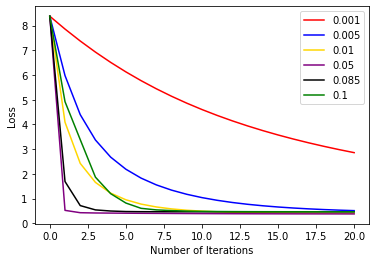

In [ ]:

alphas = [0.001, 0.005, 0.01, 0.05, 0.085, 0.1]
colors = ['red', 'blue', 'gold', 'purple', 'black', 'green']
i = 0
plt.figure()
for alpha in alphas:
  w_hat, weights, losses = gradient_descent(x, y, mse, mse_gradient, alpha)
  y_pred = w_hat[0] * x + w_hat[1]*np.sin(w_hat[2] * x + w_hat[3])
  plt.plot(range(len(losses)), losses, color=colors[i])
  i += 1
  plt.xlabel('Number of Iterations')
  plt.ylabel('Loss')

plt.legend(alphas)
plt.show()

**2.1.1** Explain the behavior of the losses over the iterations given the alpha values. Try some extra alpha values and explain the results. Explain what happens when you set the alpha value too high or too low.

Answer:

<font color='red'>A learning rate of 0.085 performs the best. When we decrease the learning rate too much or increase it too much from this point the algorithm does really poorly. The loss doesn't always decreases with the number of iterations if we choose very large or alpha values. This occurs because the gradient descent algorithm is skipping over the local minima. For example, if we set the learning rate to 1 the loss increases with the number of iterations. If we set the alpha value to a very small number, the loss decreases at a much slower rate, since it is taking much longer to converge.</font>

alpha:  0.08
w_hat:  [1.052999   0.56234554 1.06398914 0.31756412]
Loss:  0.4663062081716688


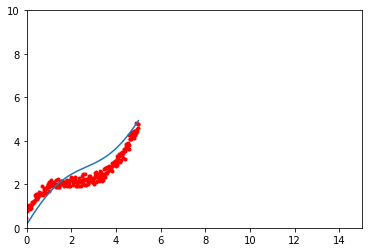

alpha:  0.085
w_hat:  [1.0511803  0.57359917 1.05856923 0.33809728]
Loss:  0.4662787406722304


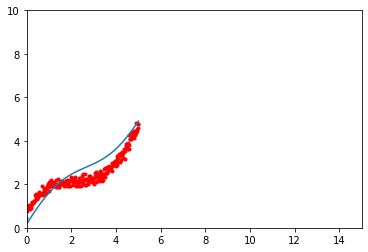

alpha:  0.09
w_hat:  [1.05237437 0.57188071 1.06261965 0.33343592]
Loss:  0.4662954413865389


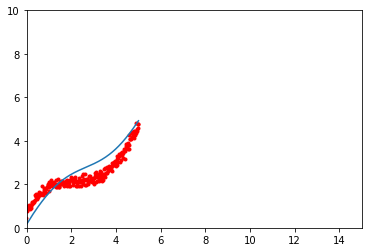

In [ ]:
#Run your gradient descent algorithm with various alphas and various number of iterations
learning_rates = [0.08, 0.085, 0.09]

def visualize_diff_learning_rates(alphas):
  for alpha in alphas:
    w_hat, weights, losses = gradient_descent(x, y, mse, mse_gradient, alpha) #change number of iterations
    y_pred = w_hat[0] * x + w_hat[1]*np.sin(w_hat[2] * x + w_hat[3])
    print("alpha: ", alpha)
    print("w_hat: ", w_hat)
    print("Loss: ", losses[len(losses) - 1])

    plt.figure()
    plt.plot(x, y_pred)
    plt.scatter(x, y, marker = '.', color='red')
    plt.xlim([0, 15])
    plt.ylim([0, 10])
    plt.show()

visualize_diff_learning_rates(learning_rates)

**2.1.2** Please comment on the effects of changing the learning rate and the number of iterations of the gradient descent algorithm. What was the optimal learning rate and why? Describe how changing the learning rates effects the number of iterations until convergence.

Your Answer Here:

<font color='red'>A learning rate of 0.085 performs the best. When we decrease the learning rate too much or increase it too much from this point the algorithm does really poorly. </font>

**Part 2.2: Batch versus Minibatch Gradient Descent**

Next we will implement batch gradient descent and explore the effects of changing the batch size. We will be doing simple linear regression which you saw earlier in this course but instead of using the closed form solution we will minimize the loss function with gradient descent with various batch sizes. 

First, lets create and visualize our data using numpy and the random libraries.

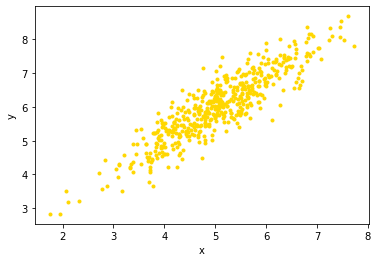

In [ ]:
# generate our data 
#the mean of the x values is 4 and the mean y value is 5
mean_vector = np.array([5.0, 6.0])

#the covariance matrix sets the variances and covariances of the data
#don't worry about the definitions of these terms, it is just a way to spread out the data
covariance_matrix = np.array([[1.0, 0.95], [0.95, 1.1]])

#we are generating 5000 data points to train our regression model
data = np.random.multivariate_normal(mean_vector, covariance_matrix, 8000) 


# visualize our data 
plt.scatter(data[:500, 0], data[:500, 1], marker = '.', color = 'gold') 
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

#x and y vectors
#x and y are of the type numpy.ndarray
x = data[:8000, 0]
y = data[:8000, 1]


Recall our standard form for linear regression is:$y = Xw$ Where our goal is to estimate the weights vector, $ \hat w $.

We know the closed form solution to OLS is $ \hat w = (X^TX)^{-1}X^Ty$

However, we will try to reach the same conclusion using the gradient descent algorithm to minimize our loss function (mean squared error) with various batch sizes.

In this case our loss function is: $L(w)= \frac{1}{2}\sum_{i=1}^n (x_i^Tw - y_i)^2$

In the following cell implement the gradient and the loss functions.

Note: In this implementation we will work with the data as a vector. Each of the n = 8000 training points is a single data point, which is represented as a scalar. All of these training points together form an x-vector. (This is the same as a data matrix X where the number of features, d = 1).


In [ ]:
# returns loss given x, y and the estimate of w 
def loss(x, y, w):
    y_hat = x*w
    return (1/2) * sum((y_hat - y)**2)

# returns the gradient with respect to w of the loss function given x and y and the estimate of w
def gradient(x, y, w): 
    y_hat =  x*w
    return sum(x*(y_hat - y))  

Now, implement generate_mini_batches. Recall from your lecture notes that mini-batch gradient descent works by choosing a random subset of k = batch_size points out of the n total training points with which to calculate the gradient. This speeds up our convergence rate and is much more computationally efficient than doing regular/full batch gradient descent. However, there is the drawback of not being able to include all the data points in the gradient and thus we may increase our loss in some of the iterations. However, on average the mini-batch gradient is a good estimate of the full-batch gradient.

In [ ]:
 #returns an array of mini-batches of size 'batch-size' given all data x, y
def generate_mini_batches(x, y, batch_size): 
    batches = []

    #pair the x and y values, so the data can be shuffled
    #shuffling is important to ensure proper mini-batches are created
    x = data[:len(x), :-1] 
    y = data[:len(x), -1].reshape((-1, 1))
    paired_data = np.hstack((x, y)) 
    np.random.shuffle(paired_data) 

    #next figure out how many batches are in your data
    n = paired_data.shape[0]
    num_batches = n // batch_size 

    i = 0
    for i in range(num_batches + 1): 
        #select your mini-batch
        mini_batch = paired_data[i * batch_size : (i + 1)*batch_size]

        #recreate your x and y vectors from the mini_batch
        mini_x = mini_batch[:batch_size, 0]
        mini_y = mini_batch[:batch_size, 1]

        #append the x and y vectors of your mini-batch to your list of batches
        batches.append((mini_x, mini_y))
         
    #deal with your leftover data is the data didn't divide evenly by batch size
    if n % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]] 
        mini_x = mini_batch[:len(mini_batch), 0]
        mini_y = mini_batch[:len(mini_batch), 1] 
        batches.append((mini_x, mini_y)) 
    
    return batches



Next, complete the implementation of  the mini-batch gradient descent function.

In [ ]:
# function to perform mini-batch gradient descent 
def minibatch_gradient_descent(x, y, w, loss_func, gradient_func, alpha = 0.001, batch_size = 30): 
    losses = []
    weights = []


    for i in range(3): 
        #use your helper function to generate your mini batches
        mini_batches = generate_mini_batches(x, y, batch_size) 
        for mini_b in mini_batches:
            #for every mini-batch, do the regular gradient descent steps
            xm, ym = mini_b 
            w = w - alpha * gradient_func(xm, ym, w) 

            #save the weights and losses in the appropriate vectors for analysis
            weights.append(w)
            losses.append(loss_func(xm, ym, w)) 
  
    return w, weights, losses

Finally, we will generate some plots to look at the performance of mini batch gradient descent. 

Run the following code to visualize how the loss changes through the number of iterations.

w =  1.1959882020305541


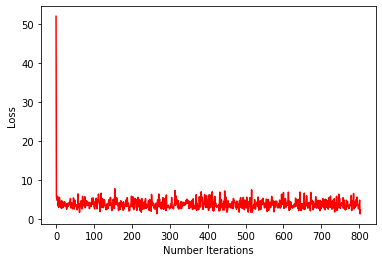

In [ ]:
w_mb, weights_mb, losses_mb = minibatch_gradient_descent(x, y, 0, loss, gradient) 
print("w = ", w_mb) 

# visualize the evolution of loss with mini batch gradient descent 
plt.plot(losses_mb, color = 'red') 
plt.xlabel("Number Iterations") 
plt.ylabel("Loss") 
plt.show()

**2.2.1:**

Return to Part 2.1 where we generated a similar plot for the various alpha values. What is the difference between this plot and those plots? Explain why are they so different and the tradeoff of regular versus mini-batch gradient descent.

Answer: <font color='red'>The loss versus number of iterations for the regular gradient descent chart was much smoother than this one. This makes sense because at any given iteration we are only using some subset of the data to compute the gradient and thus the loss has some chance of increasing at any given step, however, as expected the loss tends to move down even though there is much more variation. The tradeoff between regular versus minibatch gradient descent is computational efficiency/runtime versus accuracy. However, mini-batch is very effective and much faster and is probably preferrable for large real world data sets.</font>

**2.2.2:**
Experiment with changing the batch size by changing the default value in the minibatch_gradient_descent function defintion and re-running the cell above. Explain your findings.

Answer: <font color='red'>Increasing the batch size decreases the amount of variation in the graph and makes it much smoother. This makes sense since increasing the batchsize makes it similar to full batch gradient descent</font>

Fill in the code to plot the OLS closed form linear regression solution in purple, and the one that you obtained using mini-batch gradient descent in green. Compare these results and explain.

Answer:<font color='red'>The results are pretty much identical.</font>

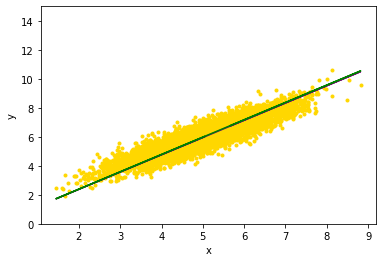

In [ ]:
plt.ylim(0,15)
#Fill in for the OLS closed form solution
w_ols_hat = (sum(x*y)/sum(x**2))
y_pred_ols = w_ols_hat*x

#Fill in for the mini batch gd solution
y_pred_gd = x*w_mb 

plt.scatter(x, y, marker = '.', color = 'gold')
plt.plot(x, y_pred_ols, color = 'purple')
plt.plot(x, y_pred_gd, color = 'green')
plt.xlabel("x") 
plt.ylabel("y") 
plt.show() 

Run the following cell to get a sense of how mini-batch gradient descent stepped between weights in various iterations. As we can see, it isn't straight and perfect but instead "noisy".

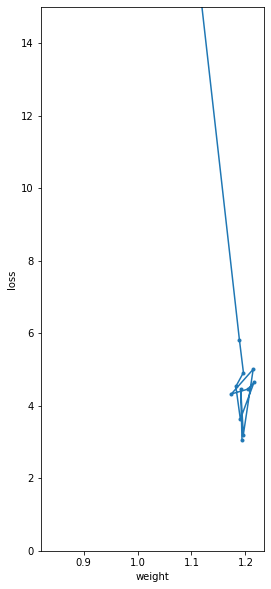

In [ ]:
plt.figure(figsize=(4,10))
plt.plot(weights_mb[::70], losses_mb[::70], marker = '.') 
plt.xlabel("weight") 
plt.ylabel("loss")
ymin, ymax = plt.ylim()
plt.ylim(0,15)
plt.show()

# **Part 3: Stochastic Gradient Descent**

In this part, we will use a modified version of our gradient descent algorithm from Part 2.1 for SGD. We will adjust the learning rate and the number of iterations of SGD to calculate its accuracy under different conditions.

In [ ]:
def mse_sgd(x, y, w, i):
  return (y[i] - w[0]*x[i] - np.sin(w[2]*x[i]))**2

def mse_gradient_sgd(x, y, w, i):

  mse_dw0 = (y[i] - w[0]*x[i] - np.sin(w[2]*x[i]))*(-2*x[i])
  mse_dw1 = (y[i] - w[0]*x[i] - w[1]*np.sin(w[2]*x[i] + w[3]))*(-2*np.sin(w[2]*x[i] + w[3]))
  mse_dw2 = (y[i] - w[0]*x[i] -  np.sin(w[2]*x[i]))*(-2*np.cos(w[2]*x[i]))*x[i]
  mse_dw3 = (y[i] - w[0]*x[i] - w[1]*np.sin(w[2]*x[i] + w[3]))*-2*(w[1]*np.cos(w[2]*x[i] + w[3]))
  
  return np.array([mse_dw0, mse_dw1, mse_dw2, mse_dw3])

def sgd(X, Y, loss_func, gradient_func, alpha, n):
    weights = []
    losses = []
    
    w = np.zeros((4,))
    weights.append(w)
    gradient = 1

    while n > 0:
        #randomly select an index for each update
        random_index = np.random.randint(0, len(X))
        gradient = gradient_func(X, Y, w, random_index)

        #weight update step of gradient descent algorithm
        w = w - alpha*gradient

        weights.append(w)
        n -= 1

    losses = [loss_func(X, Y, i, random_index) for i in weights]

    return w, weights, losses

**Part 3.1: Learning Rate**

First, we will evaluate the performance of SGD given various values of alpha. Plot the loss with respect to the number of iterations below, observing how the algorithm performs up to 1000 iterations. Run the code several times for various learning rates and describe how the optimal value(s) for learning rate and number of iterations have changed. Which values seem to guarantee convergence, and why?

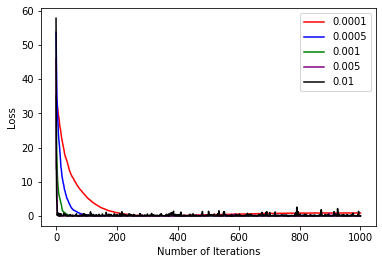

In [ ]:
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01] #replace values
colors = ['red', 'blue', 'green', 'purple', 'black']
i = 0
plt.figure()
for alpha in alphas:
  w_hat, weights, losses = sgd(x, y, mse_sgd, mse_gradient_sgd, alpha, 1000)
  y_pred = w_hat[0] * x + w_hat[1]*np.sin(w_hat[2] * x + w_hat[3])
  plt.plot(range(len(losses)), losses, color=colors[i])
  i += 1
  plt.xlabel('Number of Iterations')
  plt.ylabel('Loss')

plt.legend(alphas)
plt.show()

**Answer:** The optimal values for learning rate (originally around 0.085 in batch gradient descent) have decreased dramatically, while the number of required iterations has increased. Learning rates above 0.005 have a tendency to cause divergence, with high levels of fluctuation and no noticeable improvement as the number of iterations increase. On the other hand, learning rates below 0.001 converge too slowly. Changes are only apparent within at least the first 100 iterations. Though the results vary greatly from run to run, the learning rate of 0.005 seems to be the most reliable as iterations increase.

**Part 3.2: Iterations over SGD**


In this part, we will use our selected learning rate to explore how the number of iterations in SGD changes our model. When does the iteration count seem to become negligible?

iterations:  1


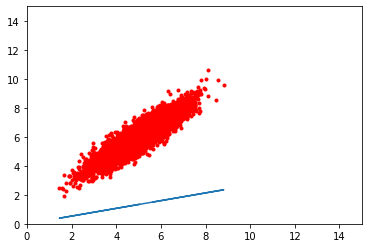

iterations:  10


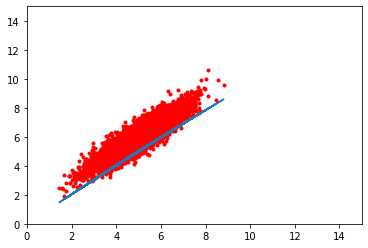

iterations:  20


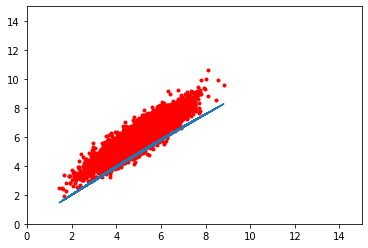

iterations:  30


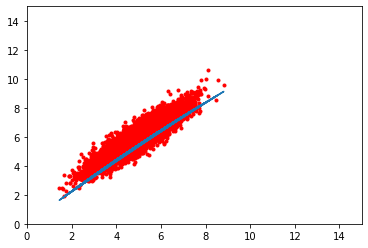

iterations:  40


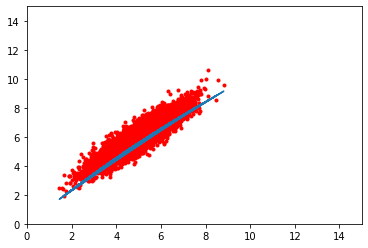

iterations:  50


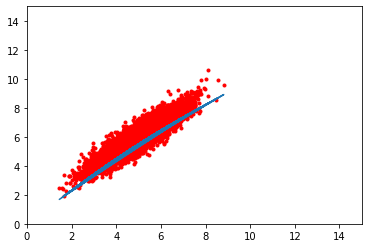

iterations:  100


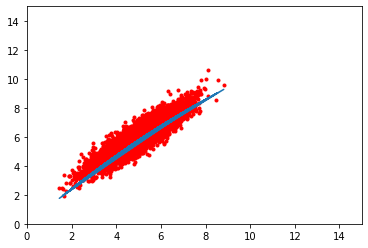

iterations:  150


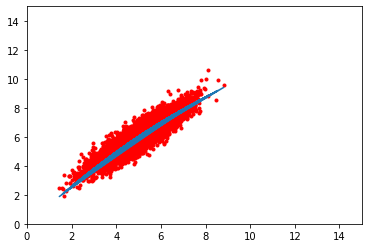

iterations:  200


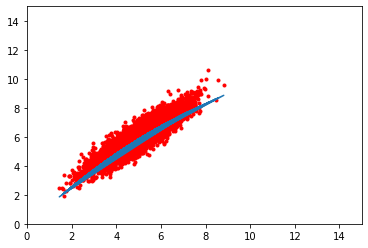

iterations:  300


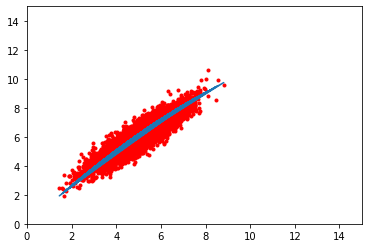

iterations:  400


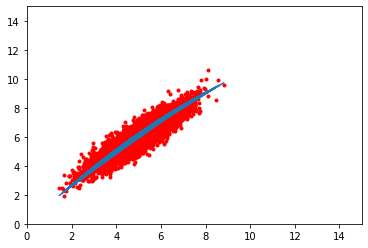

iterations:  500


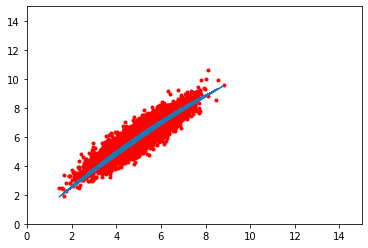

iterations:  1000


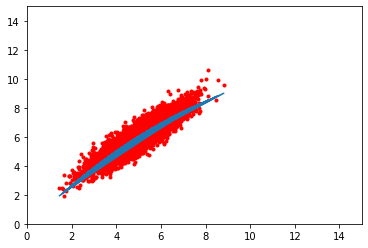

iterations:  2000


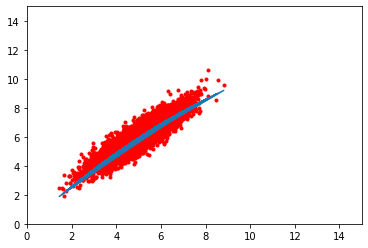

In [ ]:
alpha = 0.005 # select learning rate
iterations = [1, 10, 20, 30, 40, 50, 100, 150, 200, 300, 400, 500, 1000, 2000] # replace values

def visualize_sgd_learning_rates(iterations):
  for i in iterations:
    w_hat, weights, losses = sgd(x, y, mse_sgd, mse_gradient_sgd, alpha, i)
    y_pred = w_hat[0] * x + w_hat[1]*np.sin(w_hat[2] * x + w_hat[3])
    print("iterations: ", i)
     
    plt.figure()
    plt.plot(x, y_pred)
    plt.scatter(x, y, marker = '.', color='red')
    plt.xlim([0, 15])
    plt.ylim([0, 15])
    plt.show()

visualize_sgd_learning_rates(iterations)

**Answer:** At around 100-200 iterations with a learning rate of 0.005, the additional iterations seem to become negligible.

# **Part 4: Loss Functions on SGD** 

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
import numpy as np
X = 2 * np.random.rand(100,1)
X = scale(X)
y = 4 + 3 * X+np.random.randn(100,1)
y = np.ravel(y)


To visually demonstrate this data we use a scatter plot and demonstrate it below.


Text(0, 0.5, 'Y')

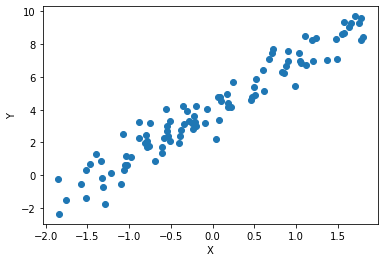

In [ ]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")

In the following parts we will apply different learning rates to each loss function and print out how well each loss function performed when initialized with a learning rate. Here we initialize SGDRegressor since the built in sklearn function decreases the learning rate automatically for each iteration.


Mean Absolute Error Loss: $|y - f(x)|$

Learning Rate: 0.1
Regression Score: 0.9318394666487197
Learning Rate: 0.01
Regression Score: 0.9321116768328171
Learning Rate: 0.002
Regression Score: 0.9264942327004073
Learning Rate: 0.0005
Regression Score: 0.4756245429936961
Learning Rate: 1e-05
Regression Score: -1.8069897688025138


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


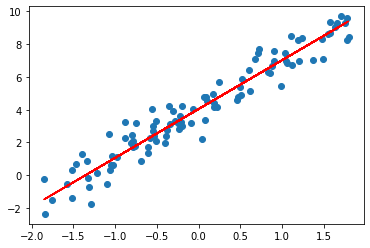

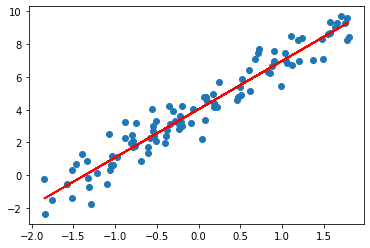

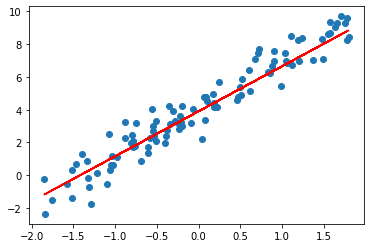

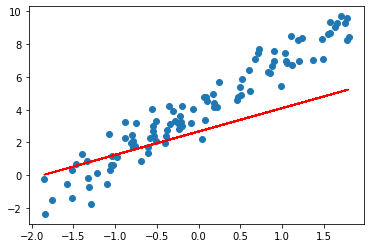

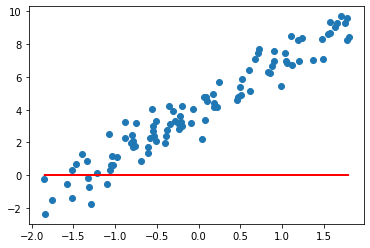

In [ ]:
l_rates = [0.1, 0.01, 0.002, 0.0005, 0.00001]

for l in l_rates:
  sgd_reg = SGDRegressor(loss = 'epsilon_insensitive', eta0 = l, max_iter = 1000, tol=1e-3,epsilon = 0)
  sgd_reg.fit(X, y)
  
  fig, ax = plt.subplots()
  ax.scatter(X, y)
  new_ys = sgd_reg.predict(X)
  ax.plot(X, new_ys, color="red")
  print("Learning Rate:", l)
  print("Regression Score:", sgd_reg.score(X, y))


The Squared Error Loss function $L = (y - f(x))^2$. 


Learning Rate: 0.1
Regression Score: 0.9323626367366058
Learning Rate: 0.01
Regression Score: 0.9322151226680154
Learning Rate: 0.002
Regression Score: 0.9277323622086251
Learning Rate: 0.0005
Regression Score: 0.9008739157346121
Learning Rate: 1e-05
Regression Score: -1.4268353078105465


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


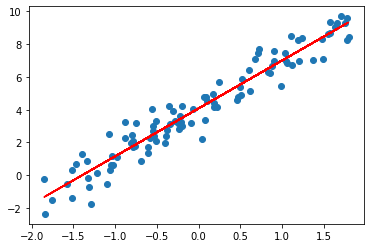

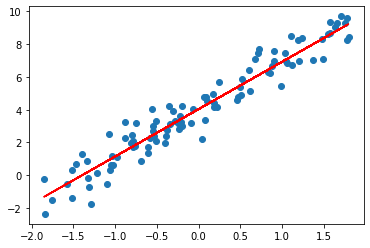

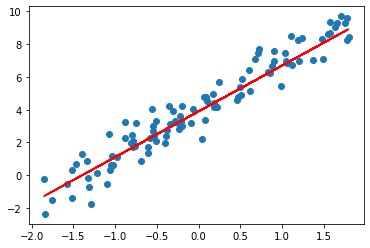

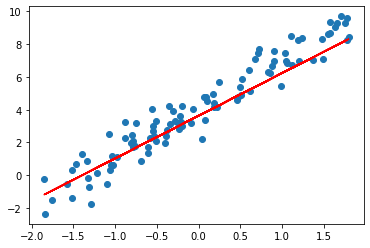

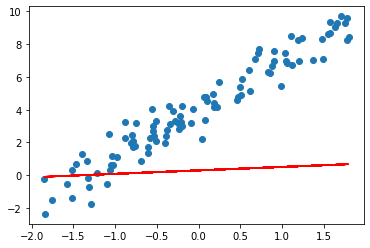

In [ ]:
l_rates = [0.1, 0.01, 0.002, 0.0005, 0.00001]
scores = []
for l in l_rates:
  sgd_reg = SGDRegressor(loss = 'squared_loss',  max_iter = 1000, tol=1e-3, eta0=l)
  sgd_reg.fit(X, y)
  fig, ax = plt.subplots()
  ax.scatter(X, y)
  new_ys = sgd_reg.predict(X)
  ax.plot(X, new_ys, color="red")
  print("Learning Rate:", l)
  print("Regression Score:", sgd_reg.score(X, y))


The Huber Loss:  $$ L=   \left\{
\begin{array}{}
     \frac{1}{2}(y-f(x))^2, & if |y-f(x)| \leq \epsilon \\
      \epsilon|y-f(x)|-\frac{1}{2}\epsilon^2,  & otherwise  \\
\end{array} 
\right.  $$ is a combination of the L1 and L2 loss functions.  

Shift some of these parameters for epsilon and vary the learning rates, comment the effect on the fit of the regression line. Does Huber Loss provide the best fit? 

NameError: ignored

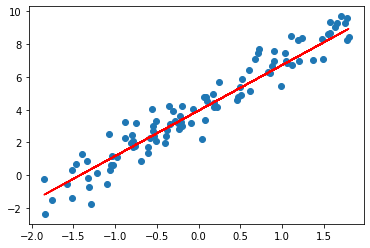

In [ ]:
l_rates = [0.1, 0.01, 0.002, 0.0005, 0.00001]
for l in l_rates:
  sgd_reg = SGDRegressor(loss = 'huber',  max_iter = 1000, tol=1e-3, eta0=l, epsilon= 0.1)
  sgd_reg.fit(X, y)
  fig, ax = plt.subplots()
  ax.scatter(X, y)
  new_ys = sgd_reg.predict(X)

  ax.plot(X, new_ys, color="red")
  sgds.append(sgd_reg)
  print("Learning Rate:", l)
  print("Regression Score:", sgd_reg.score(X, y))


From the plots above, what loss function you say has the best fit to the data provided? 
Answer: From the graphs above, we observe a gradual decrease in how accurate the fit becomes for n = 1000 iterations. Each loss function behaves differently for regression and we notice that L2 regression has the least effect for a decreasing learning rate. Huber Loss is the most prone to be wrongfully fit as a decreasing learning rate causes it to not fit well in the data but for different values of epsilon we can achieve a better fit. 

# Part 5: Variations on Gradient Descent

## Implementing ADAM

In this quick implementation exercise, you will implement the Adam Optimizer and compare it to Tradidtional Gradient Descent and Gradient Descent with Momentum. For the sake of simplicity and visualization, we will consider a one-dimensional function. This means that the gradient of the function will simply be the one dimensional derivative of the loss $\mathcal{L}(x), \frac{d\mathcal{L}}{dx}.$

We will be using the function $$\mathcal{L}(x) = \frac{1}{3}(x^4-3x^2+x),$$ with some random Gaussian noise. Below, please fill in and expression for the gradient of the loss function $\frac{d\mathcal{L}}{dx}.$ Also, plot the loss function at $300$ uniformly spaced samples from $[-2, 2]$ with i.i.d. $\mathcal{N}(0, 0.1)$ added to each of the samples. 

In [ ]:
def L(x):
    return 1/3 * ((x ** 4) - 3 * (x ** 2) + x)

def grad(x):
    ## Fill in the gradient of the Loss. ##
    grad_function = 1/3 * (4 * (x ** 3) - 6 * x + 1)
    return grad_function

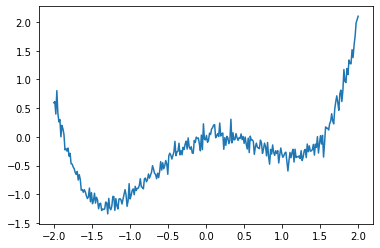

In [ ]:
# Plot Loss function with Noise.
x = np.linspace(-2, 2, 300)
no_noise = L(x)
with_noise = no_noise + np.random.normal(0, 0.1, 300)
plt.plot(x, with_noise)
plt.show()

Recall that the gradient descent update rule is (for one-dimensional functions): $$w^{t} = w^{t-1} - \eta \frac{d\mathcal{L}}{dx}.$$ Using information from your plot of the loss, think about what learning rates would be appropriate for this function. Even though the derivatives at far away points from the origin always point inward, why would a large $\eta$ value be problematic? Write your answer below. 

A large value of $\eta$ could cause us to "zig-zag" across the important parts of the function - the large value of $\eta$ basically overshadows any information we can gain about the function from the gradient. $\eta$ is a hyperparameter that must be appropriately tuned.

Now, plot the result of gradient descent for a learning rate of $\eta = 0.01$ for several different starting $w^{0}$ values (it's up to you which ones). More specifically, for each starting point you decide to investigate, plot the value of $w^{t}$ over time during standard gradient descent.

In [ ]:
## Implement Gradient Descent
def gradient_descent(w, eta, num_iterations):
    weights, times = [], []
    weights.append(w)
    times.append(0)
    for i in range(1, num_iterations + 1):
        w -= eta * grad(w)
        weights.append(w)
        times.append(i)
    return times, weights

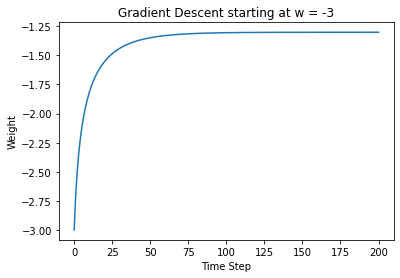

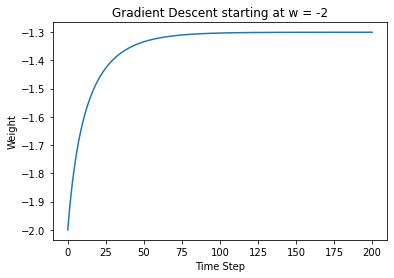

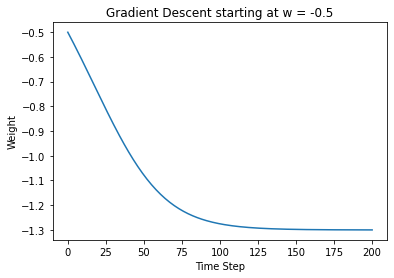

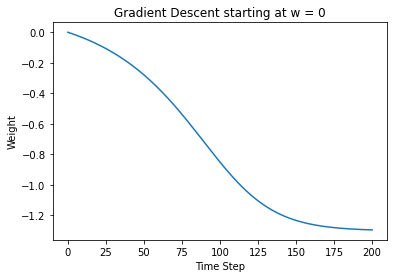

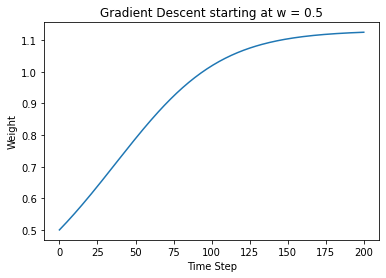

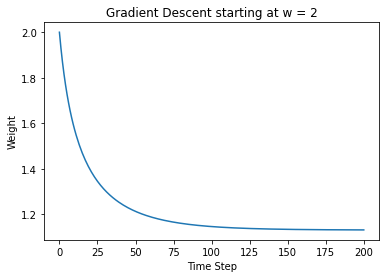

In [ ]:
for start in [-3, -2, -0.5, 0, 0.5, 2]:
    times, weights = gradient_descent(start, 0.01, 200)
    plt.plot(times, weights)
    plt.xlabel("Time Step")
    plt.ylabel("Weight")
    plt.title("Gradient Descent starting at w = " + str(start))
    plt.show()

## Momentum and ADAM

As you should have seen with traditional GD, setting $w^0$ equal to values greater than approximately $0$ will cause us to converge to a local minimum, as opposed to the desired global minimum.

The weight updates for Gradient Descent with Momentum are:
$$ v^{t} = \gamma v^{t-1} + \eta \nabla_{w}\mathcal{L}(w^{t}),$$
$$w^{t} = w^{t+1} - v^{t},$$ where we will set $\gamma = 0.9$ and $\eta = 0.01.$

In the cell below, implement gradient descent with momentum and with the above $\gamma$ and $\eta.$

Then, Choose an appropriate value for $v^0,$ the velocity term in the momentum optimizer, so that even if we start the optimization at $w^{0} = 2,$ we can reach the global minimum. Print your value of $v^0$ and the final value of $w$ after convergence.


In [ ]:
# Gradient Descent with Momentum
w = 2
lr = 0.01
num_iterations = 10000
v = -0.6
print("v: " + str(v))
gamma = 0.9
for _ in range(num_iterations):
    v = gamma * v + lr * grad(w)
    w = w - v
print("Optimal w: " + str(w))

v: -0.6
Optimal w: -1.3008395659415772


In what way does $v^{0}$ of GD with momentum act as a prior on $w$? Answer below.

If we have reason to believe that the optimal $w$ is far less than a given starting point, we can provide a negative velocity to our optimizer, and vice cersa, if we think that our optimum $w$ is greater than the current start point, we can provide a positive velocity. The velocity term will provide an extra push for the optimizer to pass over local minimas and look further instead of returning the local minimum as standard gradient descent would.

## Adam Optimizer

If you did the quiz question, you will know that the ADAM optimizer is correctly written as: 

$$v^{t} = \beta_{1}v^{t-1} + (1-\beta_{1})\nabla_{w}\mathcal{L}(w^{t-1}),$$

$$s^{t} = \beta_{2}s^{t-1} + (1-\beta_{2})(\nabla_{w}\mathcal{L}(w^{t-1}))^{2},$$

$$v^{t}, s^{t} := \frac{v^{t}}{1 - \beta_{1}^{t}}, \frac{s^{t}}{1 - \beta_{2}^{t}}$$

$$w^{t} = w^{t-1} - \frac{\eta v^{t}}{\sqrt{s^{t} + \epsilon}}.$$

Implement this below and plot $w^{t}$ as a function of $t$ once more.

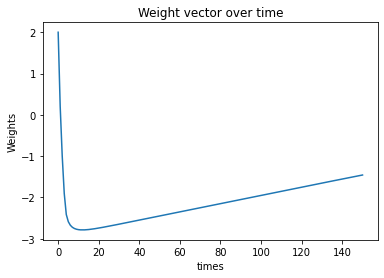

In [ ]:
beta_1, beta_2 = 0.8, 0.8
epsilon = 0
lr = 0.01
w = 2
v, s = 300, -1
num_iterations = 150
weights = [w]
times = [0]
for t in range(1, num_iterations + 1):
    v = beta_1 * v + (1 - beta_1) * grad(w)
    s = beta_2 * s + (1 - beta_2) * (grad(w) ** 2)
    v_hat, s_hat = v / (1 - (beta_1 ** t)), s / (1 - (beta_2 ** t))
    w = w - (lr * v_hat) / (np.sqrt(s_hat) + epsilon)
    weights.append(w)
    times.append(t)
plt.plot(times, weights)
plt.xlabel("times")
plt.ylabel("Weights")
plt.title("Weight vector over time")
plt.show()

Notice that the optimizer follows a similar structure to a ball rolling with some speed, overshooting a valley, and eventually settling down into the bottom of the valley. Think once again how this relates to GD with momentum.